# Funções APS Otimização Pelo Vetor Gradiente
## Grupo:
* Pedro De Lucca
* Pedro Dutra
* Fernando Mattos

In [137]:
import sympy as sp
import math

## 1ª Etapa

###    Identificando a função a ser estudada:
* f(x,y) = 3x² + 3xy + 2y² + x + y

 A partir do GeoGebra, obtém-se o gráfico da função f(x,y):

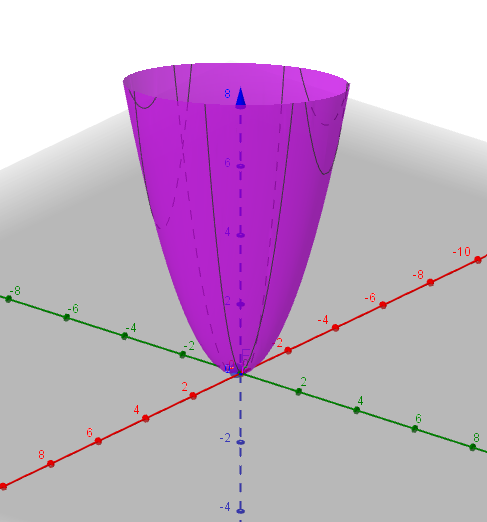

 Ao analisarmos o gráfico, notamos que f(x,y) possui um único ponto mínimo e não possui ponto máximo.

###    Determinando o vetor gradiente de f(x,y):

 Para um ponto (x,y) qualquer, calculamos:

In [138]:
# Definindo as variáveis
x, y = sp.symbols('x y')

# Definindo a função
f = 3*x**2 + 3*x*y + 2*y**2 + x + y

# Calculando o gradiente
calcula_gradiente = [sp.diff(f, var) for var in (x, y)]
print(calcula_gradiente)

[6*x + 3*y + 1, 3*x + 4*y + 1]


### Elaborando um código que nos permita identificar o ponto mínimo de f(x,y):

In [139]:
# Colocando os valores do gradiente numa função
def gradiente_f(x,y):
    return[6*x + 3*y + 1, 3*x + 4*y + 1]

def f(x,y):
    return 3*x**2 + 3*x*y + 2*y**2 + x + y

In [140]:
# Construindo uma função que identifica o ponto mínimo a partir de um passo 'alpha', uma lista de pontos iniciais 'initial_points',  
# um limite de convergencia 'threshold' e um número máximo de iterações 'max_iterations'
def ponto_minimo_f(alpha, initial_points, threshold, max_iterations):
    # Loop para calcular os pontos a partir de mais de um ponto inicial (Será o caso para as próximas duas etapas).
    for point in initial_points:
        x, y = point
        iterations = 0

        # Loop para calcular o vetor gradiente, com as seguintes condições: O valor positivo de x (abs(gradiente(x,y)[0])) deve
        #  ser maior que o limite de convergência (condição dada pelo enunciado) e as iterações não podem passar de 1000, caso
        # passe, isso significa que houve falha ao convergir.
        while abs(gradiente_f(x, y)[0]) > threshold and iterations < max_iterations: 
            a, b = gradiente_f(x, y) # 'a' equivale ao gradiente em x e 'b' ao gradiente em y
            x -= alpha * a # Calcula x a partir do alpha
            y -= alpha * b # Calcula y a partir do alpha
            iterations += 1 # Soma mais uma iteração
            try:
                z = f(x,y)
            except:
                pass
            
        # Caso as iterações não ultrapssem o limite, 'printa' os pontos de mínimo com o número de iterações necessárias 
        if iterations < max_iterations:
            print(f"Convergência alcançada a partir do ponto inicial ({point[0]:.2f}, {point[1]:.2f})")
            print(f"O ponto mínimo é ({x:.5f}, {y:.5f}, {z:.5f}) após {iterations} iterações")

        # Caso ultrapasse, podemos inferir que houve falha ao convergir
        else:
            print(f"Falha ao convergir a partir do ponto inicial ({point[0]:.2f}, {point[1]:.2f})")

 Iremos definir, assim, os parâmetros desejados para encontrarmos nosso ponto mínimo utilizando 5 passos (taxas de aprendizagem) distintos (α0 = 0.10, α1 = 0.15, α2 = 0.20, α3 = 0.30 e α4 = 0.50)

In [141]:
alpha0 = 0.10  # Taxa de aprendizagem 1
alpha1 = 0.15  # Taxa de aprendizagem 2
alpha2 = 0.20  # Taxa de aprendizagem 3
alpha3 = 0.30  # Taxa de aprendizagem 4
alpha4 = 0.50  # Taxa de aprendizagem 5

initial_points_f = [(0, 0)]  # Pontos iniciais

threshold = 10e-6  # Limite de convergência

max_iterations = 1000  # Número máximo de iterações

Para um passo fixo α0 = 0.10, temos:

In [142]:
ponto_minimo_f(alpha0, initial_points_f, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (0.00, 0.00)
O ponto mínimo é (-0.06667, -0.19999, -0.13333) após 47 iterações


 Para um passo fixo α1 = 0.15, temos:

In [143]:
ponto_minimo_f(alpha1, initial_points_f, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (0.00, 0.00)
O ponto mínimo é (-0.06667, -0.19999, -0.13333) após 30 iterações


 Para um passo fixo α2 = 0.20, temos:

In [144]:
ponto_minimo_f(alpha2, initial_points_f, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (0.00, 0.00)
O ponto mínimo é (-0.06667, -0.20000, -0.13333) após 26 iterações


 Para um passo fixo α3 = 0.30, temos:

In [145]:
ponto_minimo_f(alpha3, initial_points_f, threshold, max_iterations)

Falha ao convergir a partir do ponto inicial (0.00, 0.00)


 Para um passo fixo α4 = 0.50, temos:

In [146]:
ponto_minimo_f(alpha4, initial_points_f, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (0.00, 0.00)
O ponto mínimo é (nan, nan, nan) após 633 iterações


Com essa análise, nota-se que o aumento do passo para valores acima de 0.20 torna instrável o processo de encontro do ponto mínimo. Isso ocorre pois o aumento demasiado de α faz com que o algoritmo ultrapasse o mínimo ou oscile em torno dele, levando a um comportamento não convergente. Por outro lado, quando fixamos a taxa de aprendizado em valores abaixo de 0.20, o processo de convergência pode se tornar lento devido ao aumento do número de iterações. Portanto, é crucial escolhermos um valor de aproximadamente 0.20 para o passo.

## 2ª Etapa
###    Identificando a função a ser estudada:
* g(x, y) = sqrt(x² + y² + 1) + x² ℯ^(-y²) + (x - 2)²

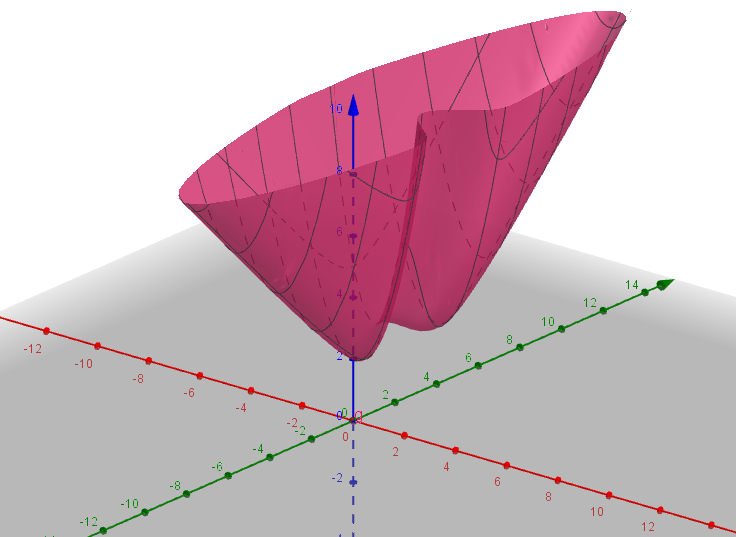

 Ao analisarmos o gráfico, notamos que g(x,y) possui dois pontos mínimos e não possui ponto máximo.

In [147]:
# Aqui calculamos o gradiente da função acima

# Definindo as variáveis
x, y = sp.symbols('x y')

# Definindo a função
g = sp.sqrt(x**2 + y**2 + 1) + x**2 * sp.exp(-y**2) + (x - 2)**2

# Calculando o gradiente
calcula_gradiente = [sp.diff(g, var) for var in (x, y)]
print(calcula_gradiente)

[2*x + 2*x*exp(-y**2) + x/sqrt(x**2 + y**2 + 1) - 4, -2*x**2*y*exp(-y**2) + y/sqrt(x**2 + y**2 + 1)]


In [148]:
# Colocamos os valores do gradiente numa função
def gradiente_g(x, y):
    return [2*x + 2*x*math.exp(-y**2) + x/math.sqrt(x**2 + y**2 + 1) - 4,
            -2*x**2*y*math.exp(-y**2) + y/math.sqrt(x**2 + y**2 + 1)]

def g(x,y):
    return sp.sqrt(x**2 + y**2 + 1) + x**2 * sp.exp(-y**2) + (x - 2)**2

In [149]:
# Construindo uma função que identifica, em g(x,y) o ponto mínimo a partir de um passo 'alpha', uma lista de pontos iniciais 'initial_points',  
# um limite de convergencia 'threshold' e um número máximo de iterações 'max_iterations'
def ponto_minimo_g(alpha, initial_points, threshold, max_iterations):
    # Loop para calcular os pontos a partir de mais de um ponto inicial (Será o caso para as próximas duas etapas).
    for point in initial_points:
        x, y = point
        iterations = 0

        # Loop para calcular o vetor gradiente, com as seguintes condições: O valor positivo de x (abs(gradiente(x,y)[0])) deve
        #  ser maior que o limite de convergência (condição dada pelo enunciado) e as iterações não podem passar de 1000, caso
        # passe, isso significa que houve falha ao convergir.
        while abs(gradiente_g(x, y)[0]) > threshold and iterations < max_iterations: 
            a, b = gradiente_g(x, y) # 'a' equivale ao gradiente em x e 'b' ao gradiente em y
            x -= alpha * a # Calcula x a partir do alpha
            y -= alpha * b # Calcula y a partir do alpha
            iterations += 1 # Soma mais uma iteração
            z = g(x,y)

        # Caso as iterações não ultrapssem o limite, 'printa' os pontos de mínimo com o número de iterações necessárias 
        if iterations < max_iterations:
            print(f"Convergência alcançada a partir do ponto inicial ({point[0]:.2f}, {point[1]:.2f})")
            print(f"O ponto mínimo é ({x:.5f}, {y:.5f}, {z:.5f}) após {iterations} iterações")

        # Caso ultrapasse, podemos inferir que houve falha ao convergir
        else:
            print(f"Falha ao convergir a partir do ponto inicial ({point[0]:.2f}, {point[1]:.2f})")

In [150]:
alpha0 = 0.05  # Taxa de aprendizagem 1
alpha1 = 0.20  # Taxa de aprendizagem 2
alpha2 = 0.50  # Taxa de aprendizagem 3
alpha3 = 0.60  # Taxa de aprendizagem 4
alpha4 = 0.80  # Taxa de aprendizagem 6

initial_points_g = [(-1, -1), (1, 1)]  # Pontos iniciais

threshold = 10e-6  # Limite de convergência

max_iterations = 1000  # Número máximo de iterações

Para um passo fixo α0 = 0.05, temos:

In [151]:
ponto_minimo_g(alpha0, initial_points_g, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (-1.00, -1.00)
O ponto mínimo é (1.54617, -1.56424, 2.82900) após 223 iterações
Convergência alcançada a partir do ponto inicial (1.00, 1.00)
O ponto mínimo é (1.54617, 1.56424, 2.82900) após 202 iterações


Para um passo fixo α1 = 0.20, temos:

In [152]:
ponto_minimo_g(alpha1, initial_points_g, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (-1.00, -1.00)
O ponto mínimo é (1.54618, -1.56424, 2.82900) após 50 iterações
Convergência alcançada a partir do ponto inicial (1.00, 1.00)
O ponto mínimo é (1.54618, 1.56424, 2.82900) após 47 iterações


Para um passo fixo α2 = 0.50, temos:

In [153]:
ponto_minimo_g(alpha2, initial_points_g, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (-1.00, -1.00)
O ponto mínimo é (1.54619, -1.56427, 2.82900) após 18 iterações
Convergência alcançada a partir do ponto inicial (1.00, 1.00)
O ponto mínimo é (1.54618, 1.56425, 2.82900) após 24 iterações


Para um passo fixo α3 = 0.60, temos:

In [154]:
ponto_minimo_g(alpha3, initial_points_g, threshold, max_iterations)

Convergência alcançada a partir do ponto inicial (-1.00, -1.00)
O ponto mínimo é (1.54619, -1.56425, 2.82900) após 92 iterações
Convergência alcançada a partir do ponto inicial (1.00, 1.00)
O ponto mínimo é (1.54618, 1.56425, 2.82900) após 116 iterações


Para um passo fixo α4 = 0.80, temos:

In [155]:
ponto_minimo_g(alpha4, initial_points_g, threshold, max_iterations)

Falha ao convergir a partir do ponto inicial (-1.00, -1.00)
Falha ao convergir a partir do ponto inicial (1.00, 1.00)


Com essa análise, nota-se que o aumento do passo para valores acima de 0.50 torna instrável o processo de encontro do ponto mínimo. Isso ocorre pois o aumento demasiado de α faz com que o algoritmo ultrapasse o mínimo ou oscile em torno dele, levando a um comportamento não convergente. Por outro lado, quando fixamos a taxa de aprendizado em valores abaixo de 0.50, o processo de convergência pode se tornar lento devido ao aumento do número de iterações. Portanto, é crucial escolhermos um valor de aproximadamente 0.50 para o passo.

## 3ª Etapa
###    Identificando a função a ser estudada:

* h(x, y) = 4ℯ^(-x² - y²) + 3ℯ^(-x² - y² + 4x + 6y - 13) - x² / 4 - y² / 6 + 2

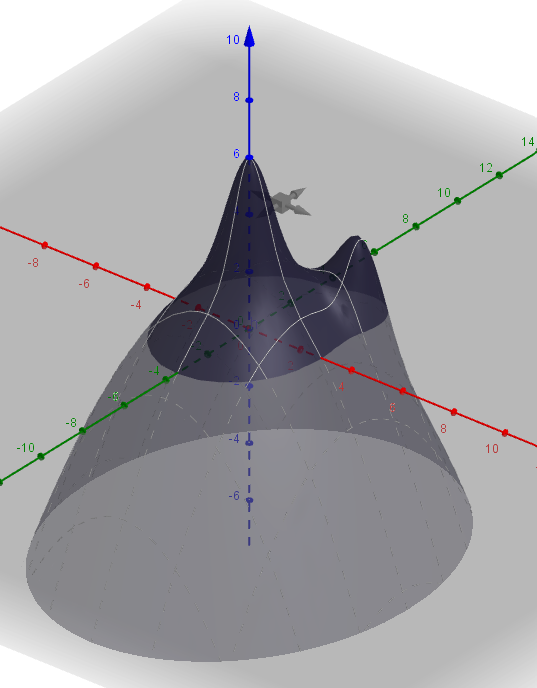

Ao analisarmos o gráfico, notamos que h(x,y) possui dois pontos máximos e não possui ponto mínimo.

In [156]:
# Aqui calculamos o gradiente da função acima

# Definindo as variáveis
x, y = sp.symbols('x y')

# Definindo a função
h =  4 * sp.exp(-x**2 - y**2) + 3 * sp.exp(-x**2 - y**2 + 4*x + 6*y - 13) - x**2 / 4 - y**2 / 6 + 2

# Calculando o gradiente
calcula_gradiente = [sp.diff(h, var) for var in (x, y)]
print(calcula_gradiente)

[-8*x*exp(-x**2 - y**2) - x/2 + 3*(4 - 2*x)*exp(-x**2 + 4*x - y**2 + 6*y - 13), -8*y*exp(-x**2 - y**2) - y/3 + 3*(6 - 2*y)*exp(-x**2 + 4*x - y**2 + 6*y - 13)]


### Elaborando um código que nos permita identificar os pontos máximos de h(x,y):

In [157]:
# Colocamos os valores do gradiente numa função
def gradiente(x,y):
    return [ -8 * x * math.exp(-x**2 - y**2) - x/2 + 3*(4 - 2*x)*math.exp(-x**2 + 4*x - y**2 + 6*y - 13),
           -8 * y * math.exp(-x**2 - y**2) - y/3 + 3*(6 - 2*y)*math.exp(-x**2 + 4*x - y**2 + 6*y - 13)]

In [158]:
alpha = 0.1  # Taxa de aprendizagem (0.1, 0.15, 0.2, 0.3, 0.5)
threshold = 10e-6  # Limite de convergência
max_iterations = 1000  # Número máximo de iterações

def h(x,y):
    return  4 * sp.exp(-x**2 - y**2) + 3 * sp.exp(-x**2 - y**2 + 4*x + 6*y - 13) - x**2 / 4 - y**2 / 6 + 2


initial_points = [(0, 0), (2, 2)]  # Pontos iniciais

# Loop para calcular os pontos a partir de mais de um ponto inicial
for point in initial_points:
    x, y = point
    iterations = 0

    # Loop para calcular o vetor gradiente, com as seguintes condições: O valor positivo de x (abs(gradiente(x,y)[0])) deve ser
    # maior que o limite de convergência (condição dada pelo enunciado) e as iterações não podem passar de 1000, caso passe,
    # isso significa que houve falha ao convergir.
    while abs(gradiente(x, y)[0]) > threshold and iterations < max_iterations:
        a, b = gradiente(x, y)
        x += alpha * a
        y += alpha * b
        iterations += 1
        z = h(x,y)

    # Caso as iterações não ultrapssem o limite, 'printa' os pontos de mínimo com o número de iterações necessárias
    if iterations < max_iterations:
        print(f"Convergência alcançada a partir do ponto inicial ({point[0]:.2f}, {point[1]:.2f})")
        print(f"O ponto máximo é ({x:.5f}, {y:.5f}, {z:.5f}) após {iterations} iterações")
        
    # Caso ultrapasse, podemos inferir que houve falha ao convergir
    else:
        print(f"Falha ao convergir a partir do ponto inicial ({point[0]:.2f}, {point[1]:.2f})")


Convergência alcançada a partir do ponto inicial (0.00, 0.00)
O ponto máximo é (0.00000, 0.00000, 6.00001) após 1 iterações
Convergência alcançada a partir do ponto inicial (2.00, 2.00)
O ponto máximo é (1.83832, 2.83383, 2.65976) após 19 iterações


### A partir do código acima, os dois pontos máximos encontrados foram:
* Ponto H1( 0 ; 0 ; 6 ), após 1 iteração;
* Ponto H2( 1,83832 ; 2,83383 ; 2,65976), após 19 iterações.

## 4ª Etapa

### Análise de passo váriavel

 A utilização de um passo variável no método do gradiente é uma técnica que permite ajustar a taxa de aprendizado (learning rate) durante a otimização da função. Essa abordagem é útil quando a taxa de aprendizado fixa pode levar a problemas como convergência lenta ou oscilação em torno do mínimo.

Para uma função multivariada como a função f(x,y), é necessário calcular o gradiente em relação a cada variável e ajustar a taxa de aprendizado de acordo.

Uma técnica comum para implementar um passo variável em problemas de otimização multivariáveis é o algoritmo de otimização estocástica conhecido como Adam (Adaptive Moment Estimation). O algoritmo Adam combina conceitos do método do gradiente com passo variável e do método RMSprop.

O código abaixo mostra  aimplementação do algoritmo Adam para encontrar o ponto mínimo da função f(x,y):

In [159]:
import numpy as np

# Função a ser minimizada
def f(x, y):
    return 3*x**2 + 3*x*y + 2*y**2 + x + y

# Gradiente da função
def df(x, y):
    return np.array([6*x + 3*y + 1, 3*x + 4*y + 1])

# Parâmetros iniciais
x = 0  # Valor inicial de x
y = 0  # Valor inicial de y
learning_rate = 0.1  # Taxa de aprendizado inicial
beta1 = 0.9  # Fator de decaimento exponencial para o momento
beta2 = 0.999  # Fator de decaimento exponencial para o momento ao quadrado
epsilon = 1e-8  # Pequeno valor para evitar divisão por zero

# Variáveis para o momento
m = np.zeros(2)  # Momento
v = np.zeros(2)  # Momento ao quadrado

# Iterações
for i in range(100):
    grad = df(x, y)  # Gradiente atual

    # Atualização dos momentos
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad**2

    # Correção dos momentos
    m_hat = m / (1 - beta1**(i+1))
    v_hat = v / (1 - beta2**(i+1))

    # Ajuste da taxa de aprendizado
    adjusted_learning_rate = learning_rate / (np.sqrt(v_hat) + epsilon)

    # Atualização de x e y
    x -= adjusted_learning_rate[0] * m_hat[0]
    y -= adjusted_learning_rate[1] * m_hat[1]
    
z = f(x,y)

# Resultado
print("O ponto mínimo ocorre em (x, y,z) =", (x, y,z))
print("O valor mínimo da função é f(x, y) =", f(x, y))

O ponto mínimo ocorre em (x, y,z) = (-0.06678858003957086, -0.20073644724888765, -0.13333193468731683)
O valor mínimo da função é f(x, y) = -0.13333193468731683


Assim, observa-se que o ponto mínimo obtido a partir da análise do passo variável é muito semelhante aos pontos obtidos na primeira etapa.